In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dense,Dropout,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
df.shape

(284807, 31)

In [8]:
df.Class.unique()

array([0, 1], dtype=int64)

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [19]:
nf = df[df.Class == 0]
f = df[df.Class == 1]

In [20]:
nf = nf.sample(738) #extracting random entries of class-0 . total entries are 1.5* no.of class-1 entries

In [21]:
#creating new dataframe
data = f.append(nf,ignore_index = True)

In [22]:
data.shape

(1230, 31)

In [23]:
X = data.drop(['Class'],axis =1)
y = data['Class']

In [24]:
#Splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y)

In [25]:
X_train.shape,X_test.shape

((984, 30), (246, 30))

In [26]:
#Scaling the training and test set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [29]:
#Reshaping input to 3D
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [31]:
#CNN model
model = Sequential()
model.add(Conv1D(32,2,activation = 'relu',input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)             

In [33]:
model.compile(optimizer = Adam(learning_rate = 0.0001),loss = 'binary_crossentropy',metrics = ['accuracy'])

In [34]:
history = model.fit(X_train,y_train,epochs = 20,validation_data = (X_test,y_test))

Train on 984 samples, validate on 246 samples
Epoch 1/20
984/984 [==============================] - 5s 5ms/sample - loss: 0.6958 - accuracy: 0.7012 - val_loss: 0.5813 - val_accuracy: 0.8740
Epoch 2/20
984/984 [==============================] - 0s 410us/sample - loss: 0.4672 - accuracy: 0.8303 - val_loss: 0.5196 - val_accuracy: 0.8821
Epoch 3/20
984/984 [==============================] - 0s 247us/sample - loss: 0.3458 - accuracy: 0.8791 - val_loss: 0.4684 - val_accuracy: 0.9106
Epoch 4/20
984/984 [==============================] - 0s 277us/sample - loss: 0.3212 - accuracy: 0.9004 - val_loss: 0.4165 - val_accuracy: 0.9350
Epoch 5/20
984/984 [==============================] - 0s 282us/sample - loss: 0.3088 - accuracy: 0.8963 - val_loss: 0.3668 - val_accuracy: 0.9553
Epoch 6/20
984/984 [==============================] - 0s 259us/sample - loss: 0.2726 - accuracy: 0.9217 - val_loss: 0.3228 - val_accuracy: 0.9553
Epoch 7/20
984/984 [==============================] - 0s 291us/sample - loss: 0.

In [35]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

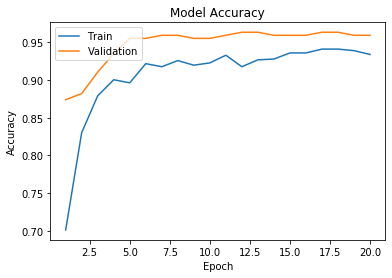

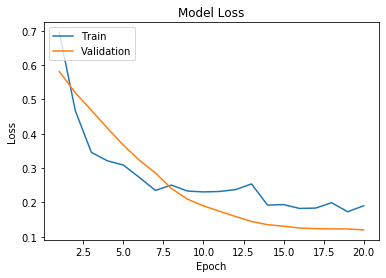

In [36]:
plotLearningCurve(history,20)